In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the training data
hotel_data= pd.read_csv("/content/Data/hotel_bookings.csv")

#Display the first rows of train data
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
hotel_data.duplicated().sum()

31994

In [7]:
#Replacing NULL values in company and agent columns with 0

values = {'company': 0, 'agent': 0}

hotel_data.fillna(value = values, inplace = True)


#Replacing NULL values in country column with most frecuent value

hotel_data['country'].fillna(value = hotel_data['country'].mode()[0], inplace = True)


#Removing row affected by NULL values in children column

hotel_data.dropna(subset = ['children'], inplace = True)

In [8]:
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

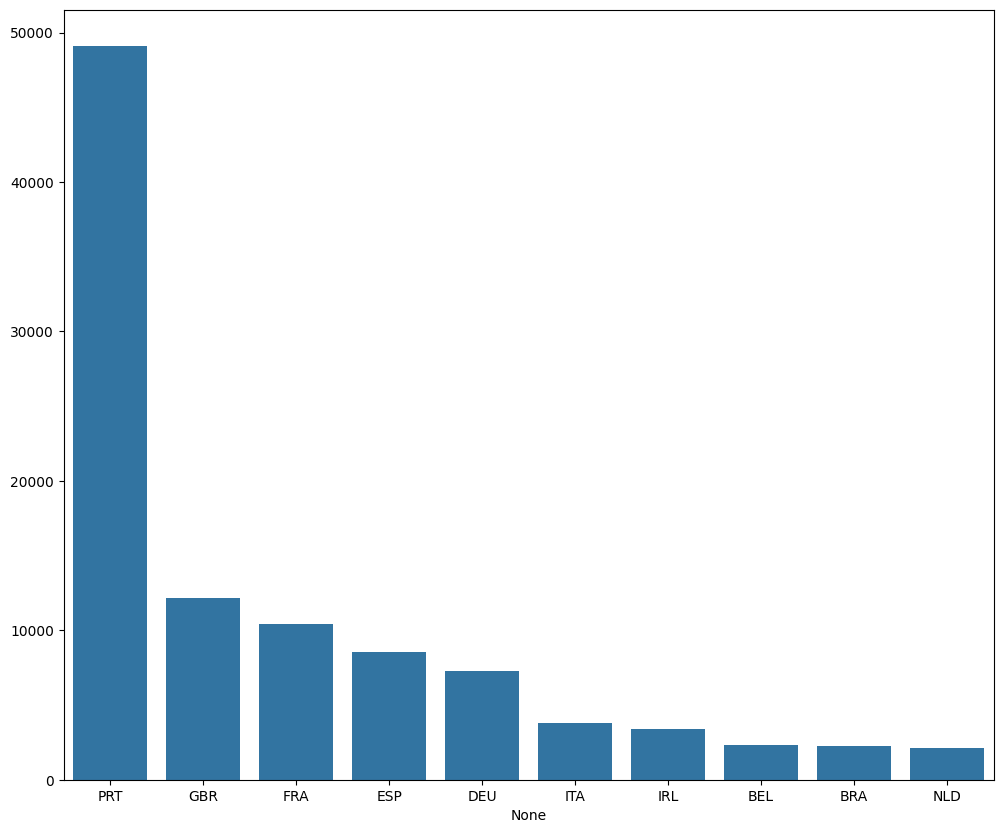

In [9]:
plt.figure(figsize=(12, 10))
top_ten = hotel_data.country.value_counts()[0:10]
sns.barplot(x=top_ten.index, y=top_ten.values)
plt.show()

In [10]:
country_wise_guests = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


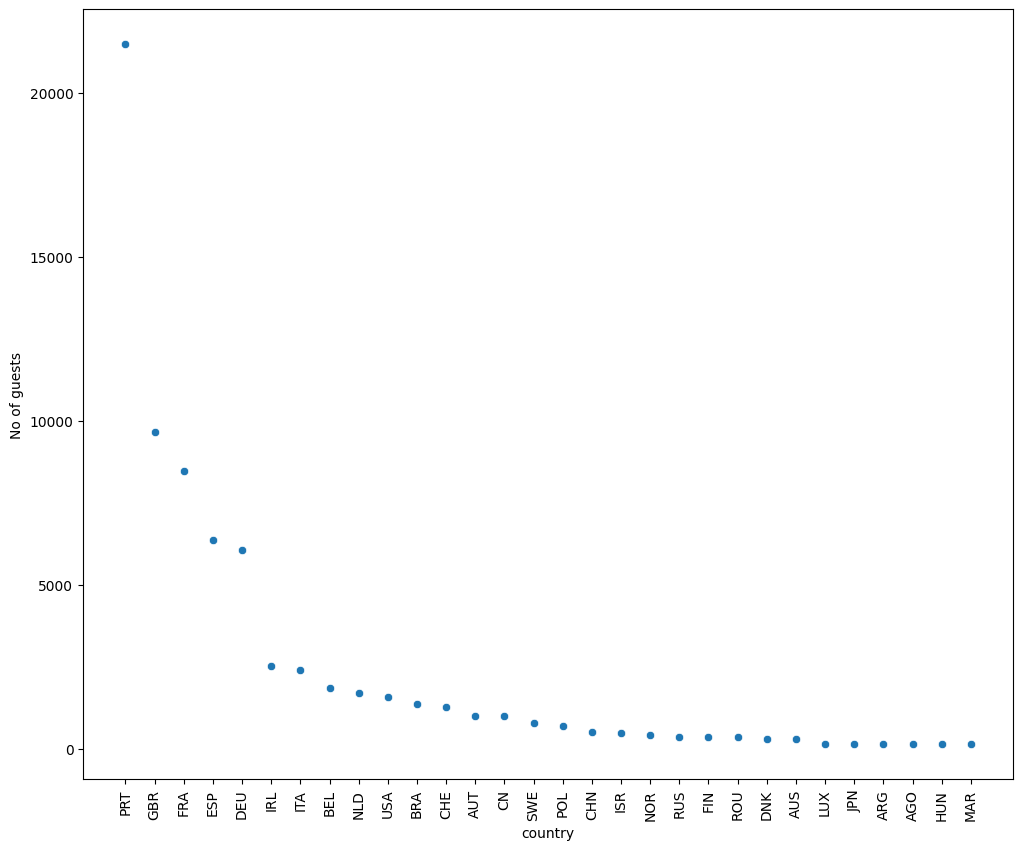

In [11]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=country_wise_guests.country[0:30], y=country_wise_guests['No of guests'])
plt.xticks(rotation=90)
plt.show()

In [12]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

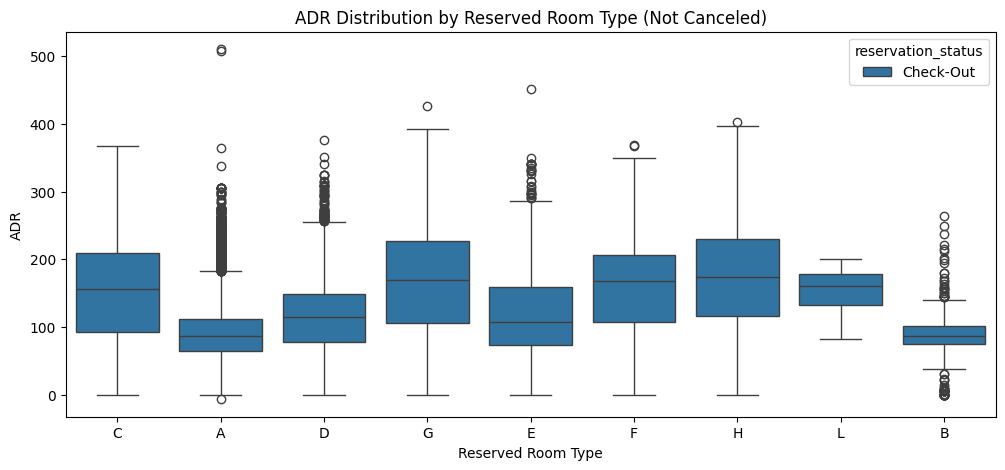

In [13]:
# Plot a boxplot
data = hotel_data[hotel_data['is_canceled'] == 0]
plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='reserved_room_type', y='adr', hue='reservation_status')
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')
plt.title('ADR Distribution by Reserved Room Type (Not Canceled)')
plt.show()


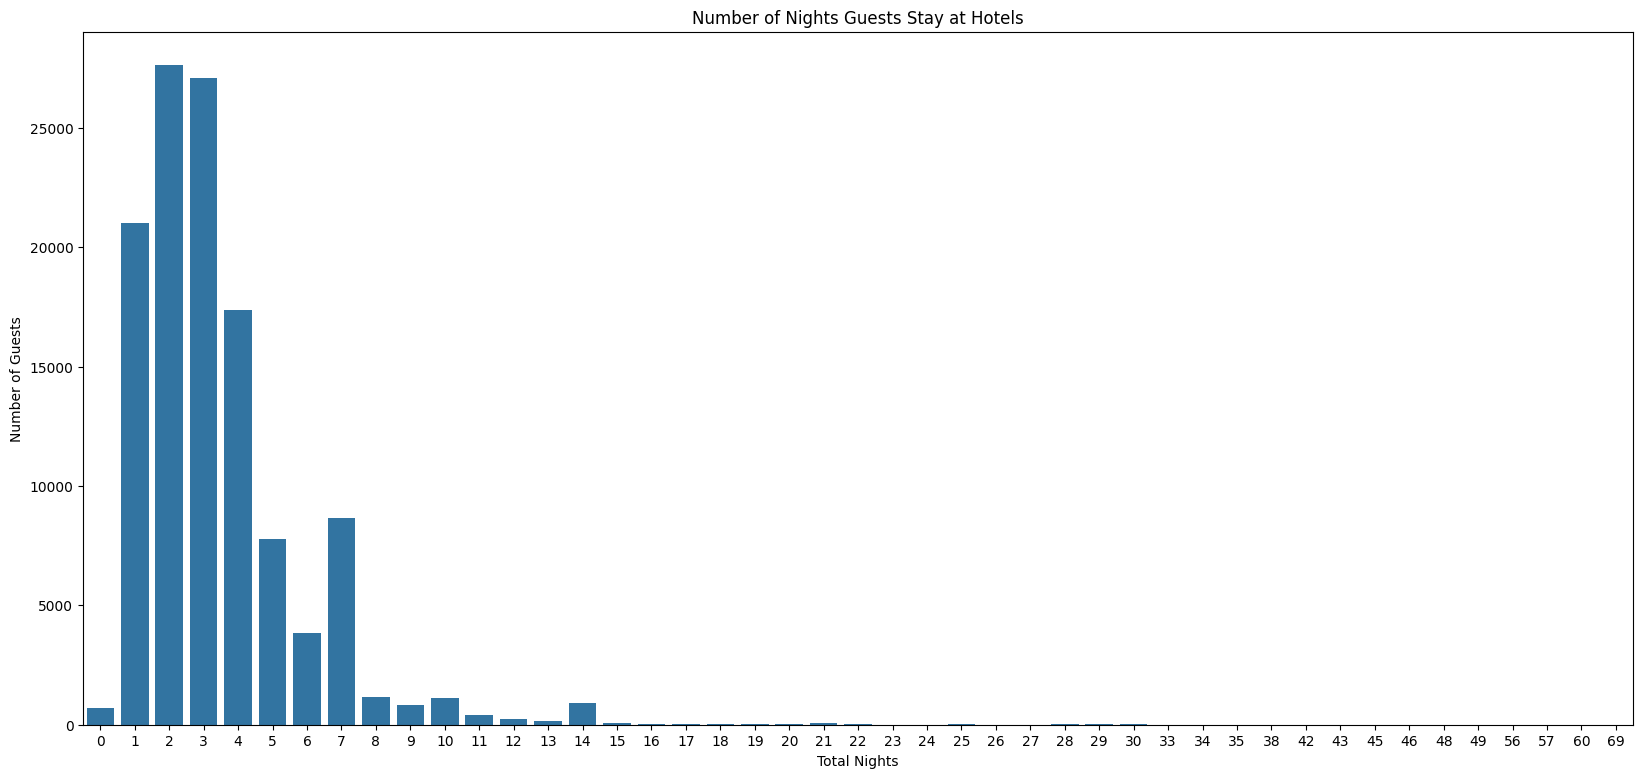

In [14]:
# Create a figure and set the size
plt.figure(figsize=(20, 9))

# Set title for the plot
plt.title('Number of Nights Guests Stay at Hotels')

# Calculate total nights by summing weekend and weekday stays
hotel_data['total_nights'] = hotel_data["stays_in_weekend_nights"] + hotel_data["stays_in_week_nights"]

# Group by total nights and count occurrences, filtering for counts > 50
df_tot = hotel_data.groupby('total_nights').filter(lambda x: len(x) > 50)
df_tot = hotel_data.groupby('total_nights').size()

# Plot a barplot
sns.barplot(x=df_tot.index, y=df_tot.values)

# Set x and y labels
plt.xlabel('Total Nights')
plt.ylabel('Number of Guests')

# Show the plot
plt.show()


In [15]:
data_resort = hotel_data[( hotel_data['hotel'] == 'Resort Hotel') & ( hotel_data['is_canceled'] == 0)]
data_city =  hotel_data[( hotel_data['hotel'] == 'City Hotel') & (hotel_data['is_canceled'] == 0)]

In [16]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [17]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays


### Data Preprocessing

In [18]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,...,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,...,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340,3.427914
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,...,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798,2.557444
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


### Splitting data into numerical and categorical

In [19]:
df_cat = hotel_data.select_dtypes('object')

In [20]:
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [21]:
df_num = hotel_data.select_dtypes(exclude='object')

In [22]:
df_num.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,3,0.0,0.0,0,0.0,0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,4,0.0,0.0,0,0.0,0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,0.0,0.0,0,75.0,0,0,1
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,304.0,0.0,0,75.0,0,0,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,240.0,0.0,0,98.0,0,1,2


### Decomposing reservation date column

In [23]:

df_cat.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [24]:
df_cat.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [25]:
y = df_num['is_canceled']
df_num.drop('is_canceled',axis=1, inplace=True)

In [26]:
from sklearn import preprocessing

In [27]:
for col in df_cat.iloc[:]:
    label_encoding = preprocessing.LabelEncoder()
    df_cat[col]    = label_encoding.fit_transform(hotel_data[col])

### Normalizing

In [28]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = preprocessing.MinMaxScaler()

def minmax_scaling(df):
    for i in df:
        arr = np.array(df[i])
        df[i] = minmax_scaler.fit_transform(arr.reshape(-1, 1))
    return df


In [30]:
df_num = minmax_scaling(df_num)

In [31]:
df_num.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights
0,0.464043,0.0,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,0.142857,0.000000,0.0,0.0,0.001180,0.0,0.0,0.000000
1,1.000000,0.0,0.5,0.0,0.0,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,0.190476,0.000000,0.0,0.0,0.001180,0.0,0.0,0.000000
2,0.009498,0.0,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.015053,0.0,0.0,0.014493
3,0.017639,0.0,0.5,0.0,0.0,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.568224,0.0,0.0,0.015053,0.0,0.0,0.014493
4,0.018996,0.0,0.5,0.0,0.0,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.448598,0.0,0.0,0.019307,0.0,0.2,0.028986


In [32]:
x=pd.concat([df_num, df_cat],axis=1)

### Split the data to train, validate and test


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)


In [34]:
print('Training Data Shape   :', x_train.shape)
print('Training Label Shape  :', y_train.shape)
print('Testing Data Shape    :', x_test.shape)
print('Training Data Shape   :', y_test.shape)


Training Data Shape   : (83570, 30)
Training Label Shape  : (83570,)
Testing Data Shape    : (35816, 30)
Training Data Shape   : (35816,)


In [50]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_shape=x_train.shape[1:], kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

# Add more hidden layers
model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(50, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

# Output layer for regression (1 neuron with linear activation)
model.add(keras.layers.Dense(1, activation='linear'))

# Compile the model with appropriate loss and metrics for regression
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Optionally, you can specify other metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_8 (Bat  (None, 30)                120       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 30)                0         
                                                                 
 dense_11 (Dense)            (None, 200)               6200      
                                                                 
 batch_normalization_9 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 200)              

In [52]:
# Compile the model for regression
model.compile(loss='mean_squared_error',   # Use mean squared error for regression
              optimizer='adam',             # You can use SGD, Adam, RMSprop, etc.
              metrics=['mean_absolute_error'])  # Use mean absolute error as metric


In [53]:
# Fit the model
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=200,
                    validation_split=.2,
                    verbose = 1
)

Epoch 1/200
2090/2090 [==============================] - 19s 8ms/step - loss: 0.0627 - mean_absolute_error: 0.1495 - val_loss: 0.0033 - val_mean_absolute_error: 0.0330
Epoch 2/200
2090/2090 [==============================] - 15s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0507 - val_loss: 7.2766e-04 - val_mean_absolute_error: 0.0152
Epoch 3/200
2090/2090 [==============================] - 15s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0343 - val_loss: 0.0010 - val_mean_absolute_error: 0.0267
Epoch 4/200
2090/2090 [==============================] - 15s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0278 - val_loss: 3.0091e-04 - val_mean_absolute_error: 0.0101
Epoch 5/200
2090/2090 [==============================] - 16s 8ms/step - loss: 9.3995e-04 - mean_absolute_error: 0.0208 - val_loss: 7.2708e-04 - val_mean_absolute_error: 0.0139
Epoch 6/200
2090/2090 [==============================] - 15s 7ms/step - loss: 6.5980e-04 - mean_absolute_error: 0.0169 - val_loss: 2.3444e-04 - 

In [54]:
y_pred = model.predict(x_test)

1120/1120 [==============================] - 3s 2ms/step


### visulaling the training journey

In [55]:
type(history.history)

dict

In [56]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

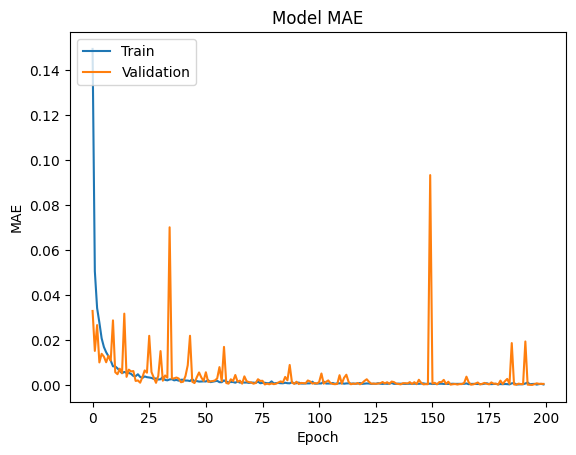

In [57]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

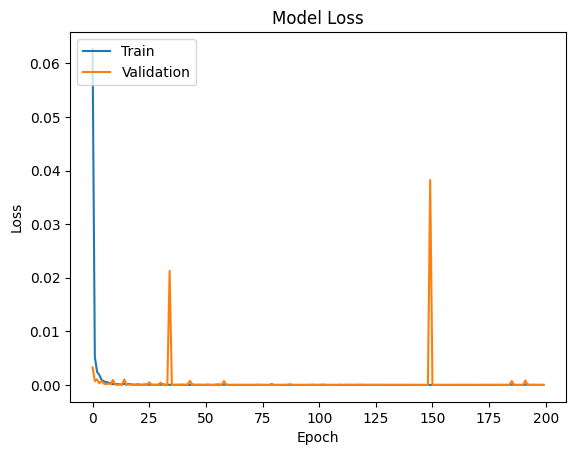

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()